In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
df.groupby('deck').sum()

<ipython-input-8-8a67a3b54257>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('deck').sum()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
deck,,,,,,,,
A,7,15,538.00,2,2,594.3583,13,12
B,35,47,1573.00,17,27,5334.7709,19,22
C,35,59,1840.42,38,28,5908.9291,31,22
D,25,37,1210.00,14,10,1889.0710,15,13
E,24,42,1143.50,10,10,1472.8542,16,17
F,8,31,219.50,7,7,243.0583,5,7
G,2,12,59.00,2,5,54.3250,0,0


In [16]:
df.groupby('survived')['deck'].count()

survived
0     67
1    136
Name: deck, dtype: int64

In [22]:
df.groupby(df.deck.isna()).sum()

<ipython-input-22-d29507074d23>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df.deck.isna()).sum()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
deck,,,,,,,,
False,136,243,6583.42,90,89,15497.3668,99,93
True,206,1814,14621.75,376,251,13196.5825,438,444


In [21]:
df.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [23]:
df['deck_indicator'] = np.where(df.deck.isna(),0,1)

In [24]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_indicator
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,0


<Figure size 640x480 with 0 Axes>

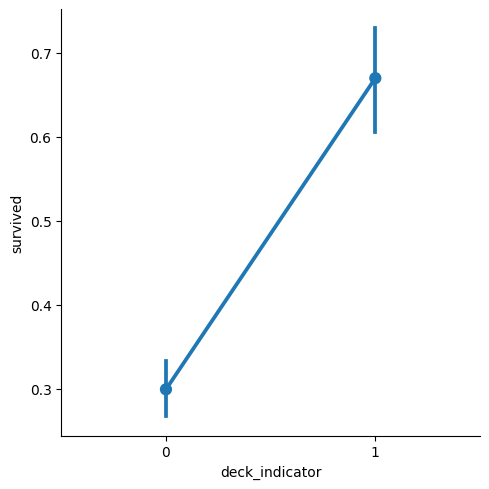

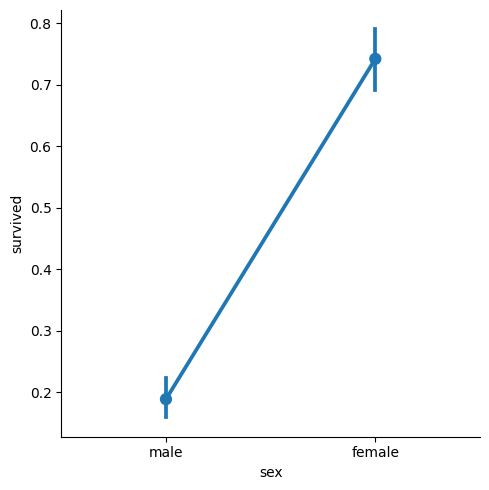

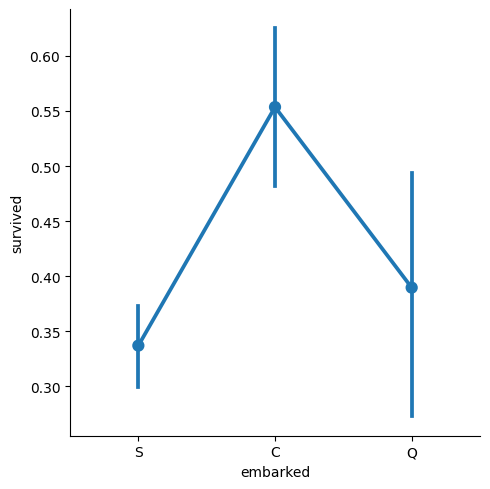

In [38]:
for i,col in enumerate(['deck_indicator', 'sex', 'embarked']):

  plt.figure(i)
  sns.catplot(x=col, y='survived', data=df, kind='point', aspect=1)

In [36]:
df.pivot_table('sex', index = 'survived', columns = 'embarked', aggfunc = 'count')

embarked,C,Q,S
survived,,,
0,75,47,427
1,93,30,217


In [37]:
df.pivot_table('survived', index = 'sex', columns = 'embarked', aggfunc = 'count')

embarked,C,Q,S
sex,,,
female,73,36,203
male,95,41,441


In [40]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [46]:
df.groupby(['survived','sex'])['sex'].count()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
Name: sex, dtype: int64

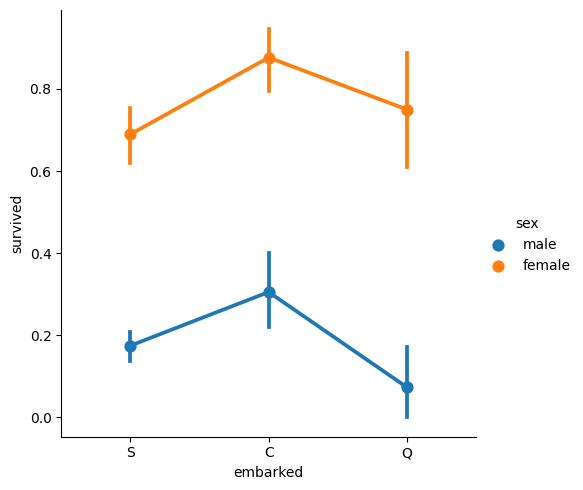

In [48]:
 sns.catplot(x='embarked', y='survived', data=df, kind='point', hue = 'sex', aspect=1)